In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sales=pd.read_excel('th_data.xlsx')
sales['Month']= sales['Date'].dt.month
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2


In [7]:
df=sales['Product line'].value_counts().reset_index()
sales_new=df.rename(columns={'count':'revenue'})
sales_new

,Product line,revenue
0,Fashion accessories,178
1,Food and beverages,174
2,Electronic accessories,170
3,Sports and travel,166
4,Home and lifestyle,160
5,Health and beauty,152


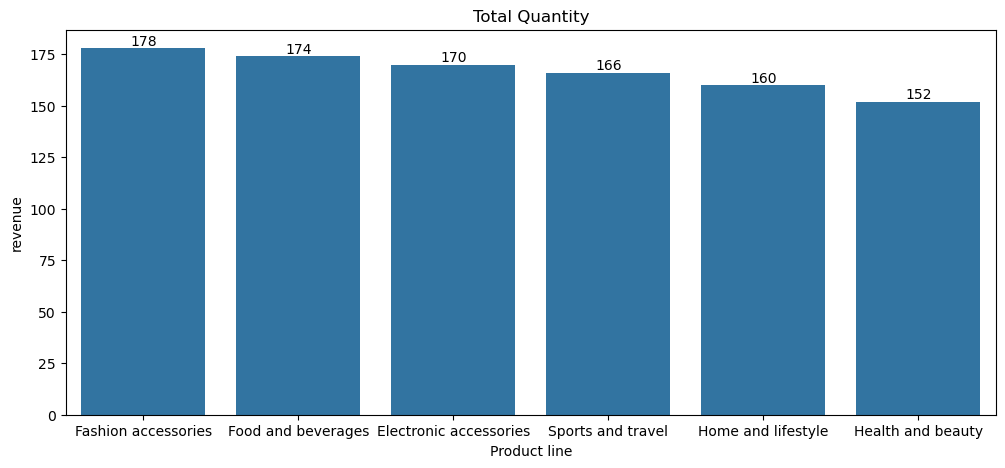

In [9]:
plt.figure(figsize=(12,5))
ax=sns.barplot(data=sales_new,x='Product line',y='revenue');
plt.title('Total Quantity');
ax.bar_label(ax.containers[0]);

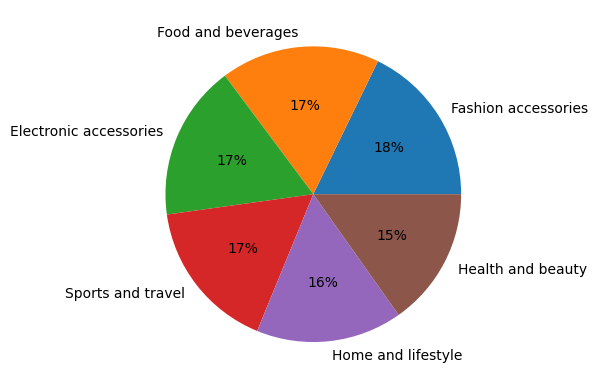

In [11]:
plt.pie(data=sales_new,x='revenue',labels='Product line',autopct='%0.f%%');

In [15]:
df_corr = pd.crosstab(sales['Product line'],sales['City'],values=sales['Total'],aggfunc='sum')
df_corr

City,Mandalay,Naypyitaw,Yangon
Product line,,,
Electronic accessories,17051.4435,18968.9745,18317.1135
Fashion accessories,16413.3165,21560.0700,16332.5085
Food and beverages,15214.8885,23766.8550,17163.1005
Health and beauty,19980.6600,16615.3260,12597.7530
Home and lifestyle,17549.1645,13895.5530,22417.1955
Sports and travel,19988.1990,15761.9280,19372.6995


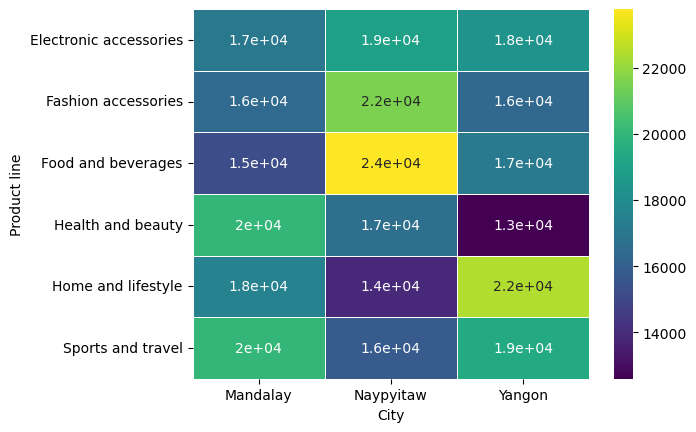

In [17]:
sns.heatmap(data=df_corr,cmap='viridis',linewidth=0.5,annot=True);

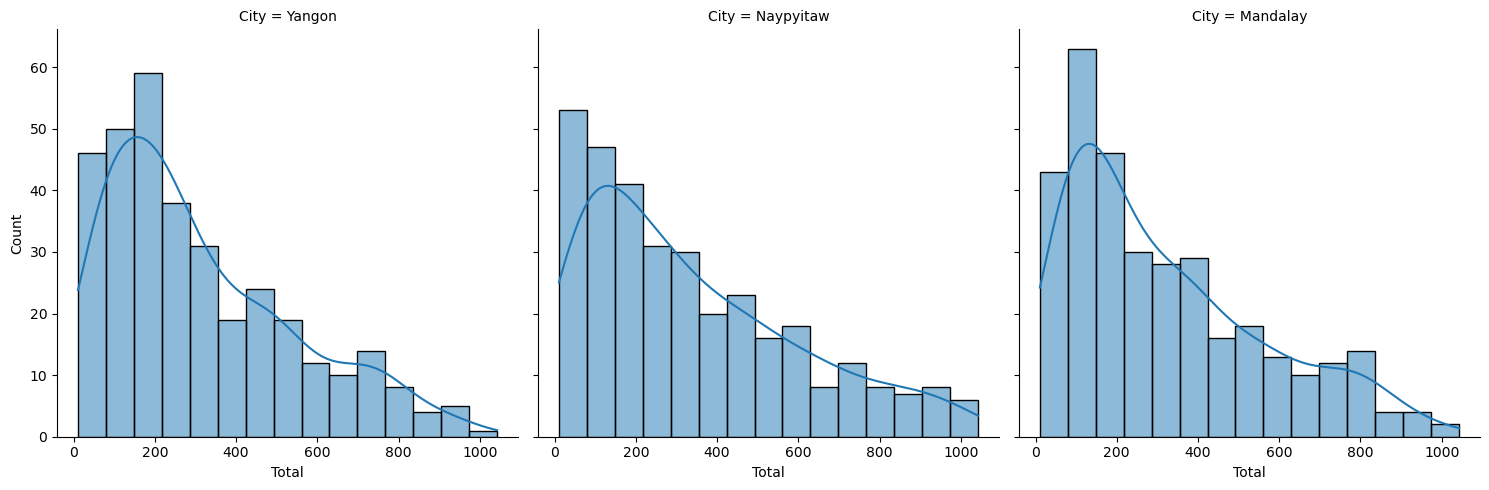

In [19]:
sns.displot(data=sales, x= 'Total',col='City',kde=True);

In [21]:
def lollipop_bar(data,xaxis,y,title=None,ylabel=None):
    fig, ax = plt.subplots(figsize=(16,10), dpi= 60)
    ax.vlines(x=data.index, ymin=0, ymax=data[y], color='firebrick', alpha=0.7, linewidth=2) 
    ax.scatter(x=data.index, y=data[y], s=75, color='firebrick', alpha=0.7) 

    ax.set_title(title, fontdict={'size':22})
    ax.set_ylabel(ylabel)
    ax.set_xticks(data.index)
    ax.set_xticklabels(data[xaxis].str.upper(), rotation=0, fontdict={'horizontalalignment':'right', 'size':12})
    ax.set_ylim(0,400)

    for row in data.itertuples():
        ax.text(row.Index, row[2]+.5, s=round(row[2], 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)
        
    plt.show()

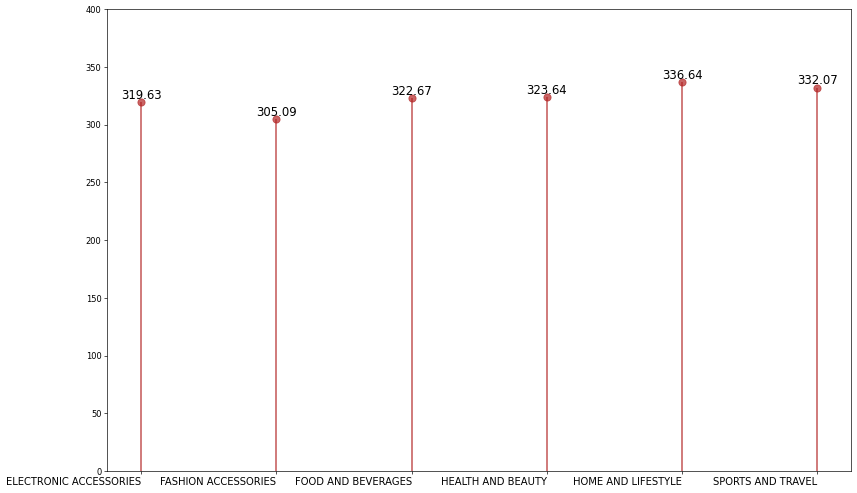

In [23]:
mean_prod = sales.groupby('Product line')['Total'].mean().reset_index()
lollipop_bar(data=mean_prod,xaxis = 'Product line',y='Total')

In [342]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2


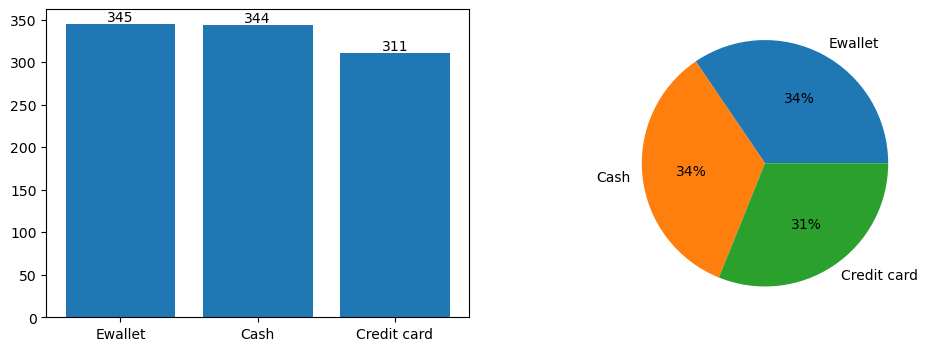

In [25]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
y=sales['Payment'].value_counts().reset_index()
ax1.bar(data=y,x='Payment',height='count')
ax1.bar_label(ax1.containers[0])
ax2.pie(data=y,x='count',labels='Payment',autopct='%0.f%%');

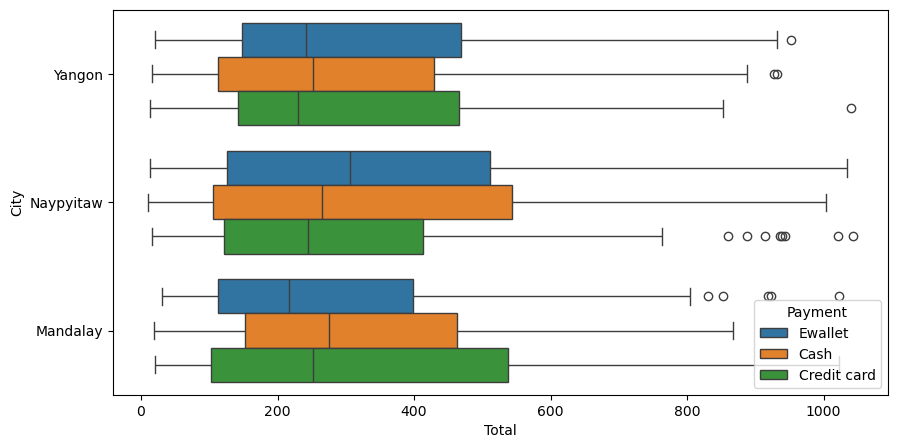

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data=sales,x='Total',y='City',hue='Payment');


In [29]:
df_new=sales.groupby(['Payment','Product line','City'])['cogs'].agg(['sum','mean']).reset_index()
df_new.head()

,Payment,Product line,City,sum,mean
0,Cash,Electronic accessories,Mandalay,6587.17,274.465417
1,Cash,Electronic accessories,Naypyitaw,9187.58,316.813103
2,Cash,Electronic accessories,Yangon,3968.09,220.449444
3,Cash,Fashion accessories,Mandalay,5387.82,244.900909
4,Cash,Fashion accessories,Naypyitaw,7303.88,331.994545


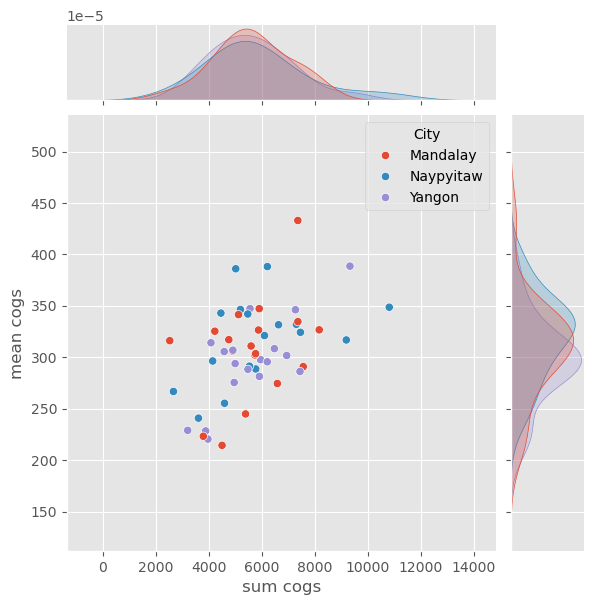

In [31]:
plt.style.use('ggplot')
sns.jointplot(data=df_new,x='sum',y='mean',hue='City')
plt.xlabel('sum cogs')
plt.ylabel('mean cogs');

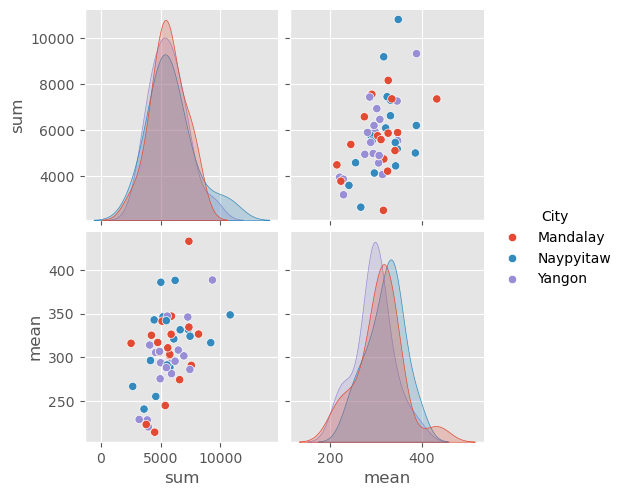

In [33]:
sns.pairplot(data=df_new,hue='City');